## Projet optimisation

### 1. Optimisation sans contraintes dans le plan



In [2]:
import numpy as np
import matplotlib.pyplot as plt

Question 4

In [3]:
def orientation(P,Q,R):
    """
    1 si sens direct ie det matrice (PQ,PR) strictement positif
    -1 si sens direct ie det matrice strictement neg
    0 si sens direct ie det matrice nul
    """
    PQ = np.array([[P[0]-Q[0]],[P[1]-Q[1]]])
    PR = np.array([[P[0]-R[0]],[P[1]-R[1]]])
    M = np.concatenate((PQ,PR),axis=1)    
    det = np.linalg.det(M)
    if(det>0):
        return 1
    if(det<0):
        return -1
    return 0

In [4]:
#http://math.univ-lyon1.fr/irem/Formation_ISN/formation_recursivite/capes/capes2017Pb2.pdf
def jarvis(E) :
    """
     Fonction qui re¸coit en argument un nuage de points et qui renvoie
     une liste contenant les indices des sommets de l’enveloppe
     convexe de ce nuage
    """
    out = [] #c'est l'enveloppe convexe
    #pour chaque point
    for i in range(len(E)):
        for j in range(i+1,len(E)): #on compare chaque point à ceux d'apres
            sommets_a_tester = []
            
            for k in range(len(E)):
                if k!=i and k!=j : #on a pas le choix, on doit tout comparer entres eux
                    sommets_a_tester.append(orientation(E[i],E[j],E[k]))
            q = sommets_a_tester[0]
            sommet = True
            for v in sommets_a_tester :
                if(v!=q):
                    #print("sommets : ",sommets_a_tester," v = ",v," q = ",q)
                    sommet = False
            if sommet & (i not in out): #not in out pour pas le rajouter
                out.append(i)
            if sommet & (j not in out):
                out.append(j)
    return out

Question 5

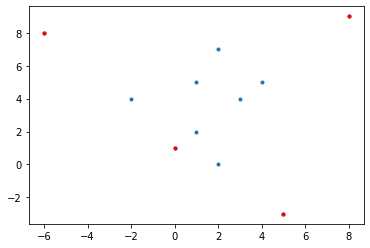

In [5]:
E = np.array([[1,2],[4,5],[8,9],[-6,8],[2,0],[2,7],[3,4],[5,-3],[-2,4],[0,1],[1,5]])
plt.plot(E[:,0],E[:,1],".")
jarvis(E)
plt.plot(E[jarvis(E),0],E[jarvis(E),1],'.r')
#Enveloppe = jarvis(E)
#plt.plot([E[i][0] for i in Enveloppe] ,[E[i][1] for i in Enveloppe],".")

On va choisir le point $\mathcal{A}=(1,5)$

Question 6

Impl´ementer les algorithmes de gradients `a pas fixe, optimal et la g´en´eralisation du gradient
conjugu´e. Indiquer, en justifiant votre choix, quelle approche vous semble la plus performante
(en fonction de la pr´ecision, du temps de calcul, de la stabilit´e...)


In [6]:
def J(x):
    #n = len(x) ?
    out = 0
    for i in range(n):
        out += norm(x - x[i],p)
    return out

def Jprime(x,y):
    return np.array([2*x*eps,2*y/eps])
#ici si 0<rho<1 on converge 


In [7]:
#xk+1 = xk − ρ∇~ J(xk).
#https://www.ceremade.dauphine.fr/~gontier/Publications/methodesNumeriques.pdf

def pasFixe(x0,J,K,rho):
    x = np.ones(K)
    x[0] = x0
    for k in range(1,K-1):
        x[k+1] = x[k] - rho * Jprime(x[k])
    return x

def pasOptimal(x0,J,K,rho0):
    x,roh = np.ones(K),np.ones(K)
    x[0] = x0
    rho[0] = rho0
    for k in range(1,K-1):
        f_k = J(x[k] - rho[k] * Jprime(x[k]))
        rho[k+1] = np.argmin(f_k)
        x[k+1] = x[k] - rho[k+1] * Jprime(x[k])
    return x, rho[1:,]


Pas fixe, cas avec J de R dans R

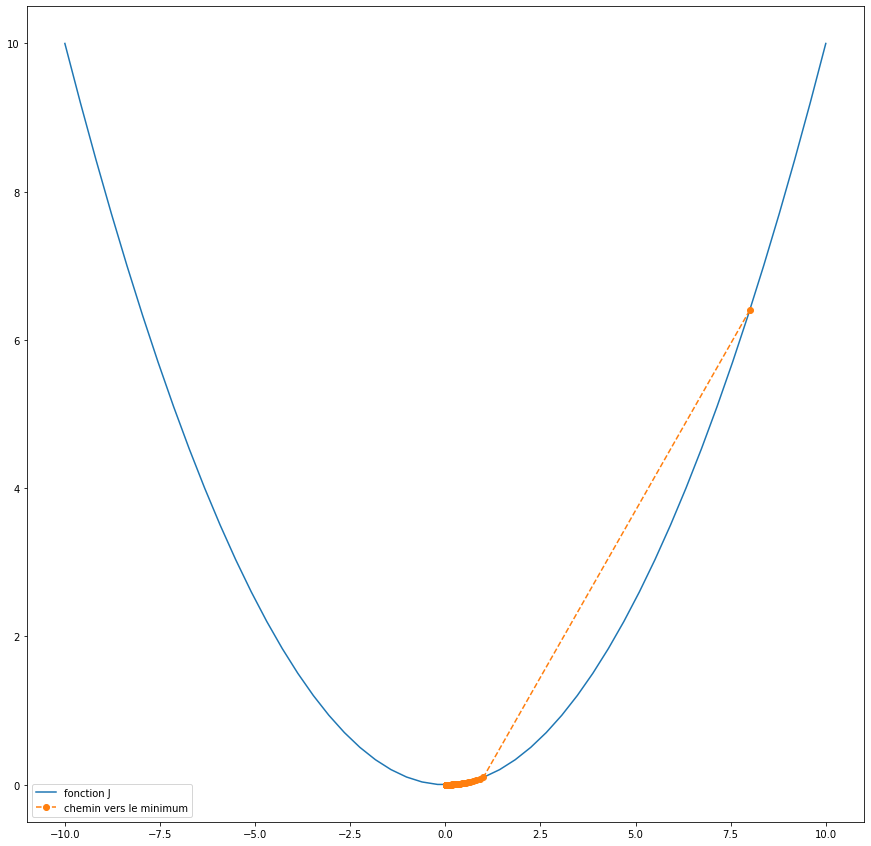

In [42]:
def J(x):
    return eps*x**2

def Jprime(x):
    return 2*x*eps

def pasFixe(x0,J,K,rho):
    x = np.ones(K)
    x[0] = x0
    for k in range(1,K-1):
        x[k+1] = x[k] - rho * Jprime(x[k])
    return x

eps = 10e-2
x0 = 8 #np.array([5,7])
K = 50
n = 100
rho = 0.5

X1 = pasFixe(x0,J,K,rho)
x = np.linspace(-10,10,K)

plt.figure(1,(15,15))

plt.plot(x,J(x), label="fonction J")
plt.plot(X1, J(X1), "--o", label=f"chemin vers le minimum")

plt.legend()

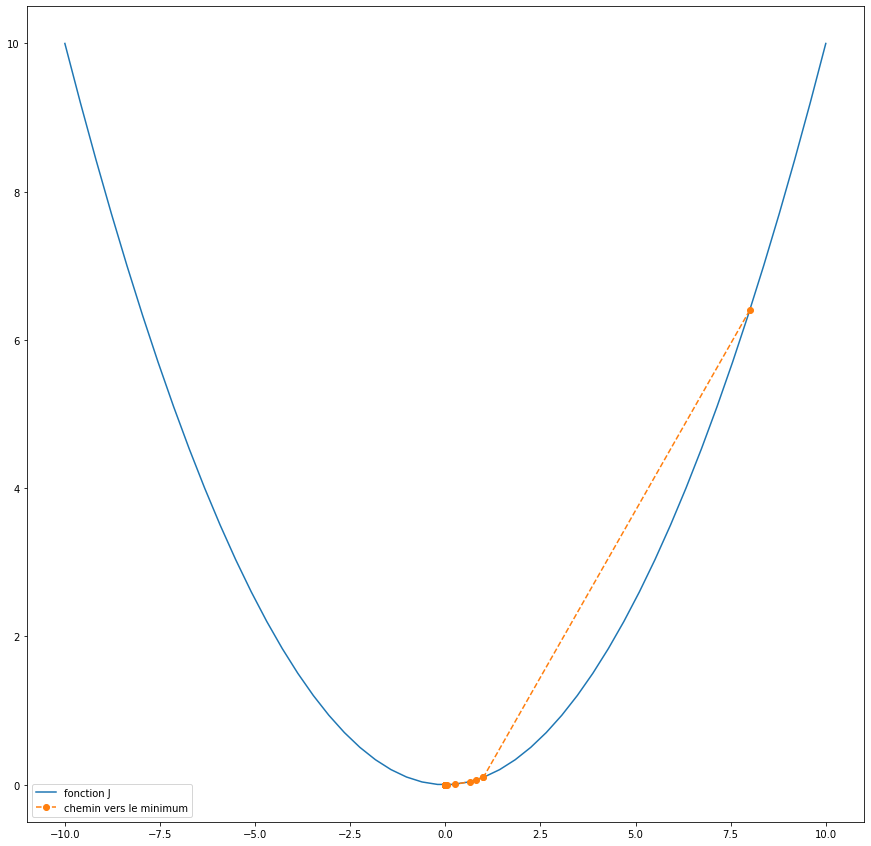

In [86]:
def J(x):
    return eps*x**2

def Jprime(x):
    return 2*x*eps

def pasOptimal(x0,J,K,rho0):
    x = np.ones(K)
    x[0] = x0
    rho = rho0
    for k in range(1,K-1):
        f_k = J(x[:k] - rho * Jprime(x[:k]))
        rho = np.argmin(f_k)
        #print("f_k :",f_k, "rho :",rho)
        x[k+1] = x[k] - rho * Jprime(x[k])
    return x

eps = 10e-2
x0 = 8
K = 50
n = 100
rho0 = 0.1

X = pasOptimal(x0,J,K,rho0)
x = np.linspace(-10,10,K)

plt.figure(1,(15,15))

plt.plot(x,J(x), label="fonction J")
plt.plot(X, J(X), "--o", label=f"chemin vers le minimum")

plt.legend()

In [78]:
X1

array([8.    , 1.    , 1.    , 0.8   , 0.64  , 0.256 , 0.0512, 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    ])

/usr/lib/python3/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  


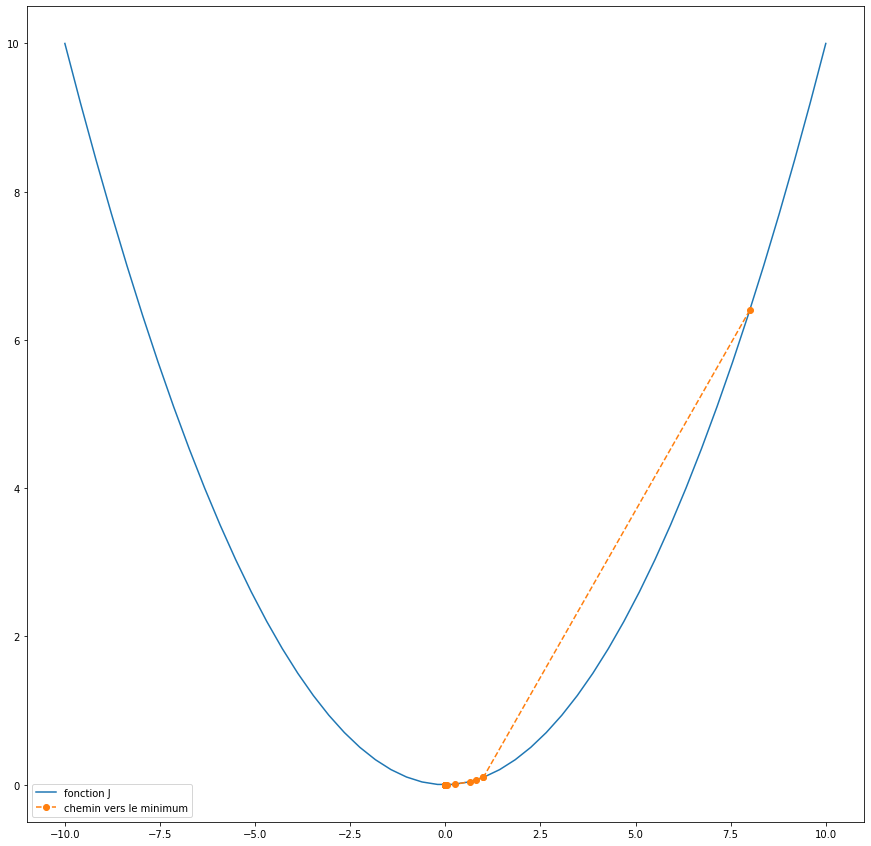

In [98]:
def J(x):
    return eps*x**2

def Jprime(x):
    return 2*x*eps

def gradientConjugue(x0,J,K,rho0):
    x = np.ones(K)
    x[0] = x0
    rho = rho0
    d = Jprime(x0)
    
    for k in range(1,K-1):
        d = Jprime(x[k]) + Jprime(x[k])*(Jprime(x[k] - Jprime(x[k-1]))) * d/np.linalg.norm(Jprime(x[k-1]))**2
        
        f_k = J(x[:k] - rho * d)
        rho = np.argmin(f_k)
        #print("f_k :",f_k, "rho :",rho)
        x[k+1] = x[k] - rho * Jprime(x[k])
    return x

eps = 10e-2
x0 = 8
K = 50
n = 100
rho0 = 0.1

Y = gradientConjugue(x0,J,K,rho0)
x = np.linspace(-10,10,K)

plt.figure(1,(15,15))

plt.plot(x,J(x), label="fonction J")
plt.plot(Y, J(Y), "--o", label=f"chemin vers le minimum")

plt.legend()

In [97]:
Xconj = gradientConjugue(x0,J,K,rho0)
XpasFixe = pasFixe(x0,J,K,rho0)
XpasOp = pasOptimal(x0,J,K,rho0)


/usr/lib/python3/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  


In [81]:
X

array([10.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])